In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
cd gdrive/MyDrive/data

/content/gdrive/MyDrive/data


Loading Required Modules

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras import optimizers
import matplotlib.pyplot as plt 
import numpy as np
import cv2
from keras.utils.np_utils import to_categorical

Loading the saved Numpy arrays after preprocessing


In [6]:

X = np.load('Xfinal.npy')
y = np.load('Yfinal.npy')
y_trainHot = to_categorical(y, num_classes = 26)

Sample Image from Dataset

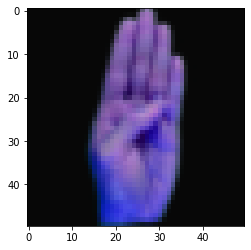

In [27]:
plt.imshow(X[1822])
#plt.title("Sample Image")
plt.show()

Splitting Data into Train,test and validation sets

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_trainHot, test_size=0.2,random_state = 12, shuffle = True)


X_train,X_val,y_train,y_val = train_test_split(X_train, y_train, test_size=0.2,random_state = 12, shuffle = True)

from sklearn.utils import shuffle

X_train,y_train = shuffle(X_train,y_train, random_state = 13)
X_test,y_test = shuffle(X_test,y_test, random_state = 13)
X_val,y_val = shuffle(X_val,y_val, random_state = 13)

In [28]:
print("XTrain shape:",X_train.shape,"\tYTrain shape",y_train.shape)
print("XTest shape:",X_test.shape,"\tYTest shape",y_test.shape)
print("XVal shape:",X_val.shape,"\tYVal shape",y_val.shape)

XTrain shape: (30201, 50, 50, 3) 	YTrain shape (30201, 26)
XTest shape: (9438, 50, 50, 3) 	YTest shape (9438, 26)
XVal shape: (7551, 50, 50, 3) 	YVal shape (7551, 26)


Loading the MobileNet architecture with ImageNet Weights

In [8]:
#Mob1
import keras
from keras.applications.mobilenet import MobileNet
mob1 = MobileNet(weights = 'imagenet',include_top = False, input_shape = (50,50,3),pooling = 'avg')


17235968/17225924 [==============================] - 0s 0us/step


In [9]:
#Freezing the base model layers in order to train top layers first
for layer in mob1.layers:
  layer.trainable = False

In [10]:
import keras.layers as layers
model = Sequential([mob1])


model.add(layers.Flatten())
model.add(layers.Dense(1024,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(26,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 1024)              3228864   
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 26)                6

In [11]:
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)
opt = opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9)
# Adding loss, optimizer and metrics values to the model.
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ["accuracy"])

# Start Training
model_training_history = model.fit(x = X_train, y = y_train, epochs = 5, batch_size = 32 , shuffle = True, callbacks = [early_stopping_callback],validation_data=(X_val,y_val))



Epoch 1/5
944/944 [==============================] - 59s 13ms/step - loss: 2.9520 - accuracy: 0.1378 - val_loss: 2.7123 - val_accuracy: 0.1972
Epoch 2/5
944/944 [==============================] - 8s 9ms/step - loss: 2.7020 - accuracy: 0.2031 - val_loss: 2.6542 - val_accuracy: 0.2151
Epoch 3/5
944/944 [==============================] - 10s 10ms/step - loss: 2.6696 - accuracy: 0.2163 - val_loss: 2.6321 - val_accuracy: 0.2172
Epoch 4/5
944/944 [==============================] - 8s 9ms/step - loss: 2.6000 - accuracy: 0.2298 - val_loss: 2.6047 - val_accuracy: 0.2271
Epoch 5/5
944/944 [==============================] - 8s 9ms/step - loss: 2.5832 - accuracy: 0.2377 - val_loss: 2.6002 - val_accuracy: 0.2314


In [ ]:
#Unfreezing the base model layers and retraining

In [12]:
for layer in mob1.layers:
  layer.trainable = True

In [14]:
full_model = Sequential([model])
opt = keras.optimizers.Adam(learning_rate=0.00001)
full_model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'])

clf = full_model.fit(x = X_train, y = y_train, epochs = 50, batch_size = 32 , shuffle = True, callbacks = [early_stopping_callback],validation_data=(X_val,y_val))



Epoch 1/50
944/944 [==============================] - 31s 24ms/step - loss: 13.0817 - accuracy: 0.0985 - val_loss: 3.7854 - val_accuracy: 0.1551
Epoch 2/50
944/944 [==============================] - 21s 23ms/step - loss: 3.7529 - accuracy: 0.1507 - val_loss: 2.9208 - val_accuracy: 0.1809
Epoch 3/50
944/944 [==============================] - 21s 23ms/step - loss: 3.0131 - accuracy: 0.1647 - val_loss: 2.6532 - val_accuracy: 0.2295
Epoch 4/50
944/944 [==============================] - 20s 22ms/step - loss: 2.7248 - accuracy: 0.2178 - val_loss: 2.3621 - val_accuracy: 0.3015
Epoch 5/50
944/944 [==============================] - 20s 22ms/step - loss: 2.4733 - accuracy: 0.2696 - val_loss: 2.0857 - val_accuracy: 0.3764
Epoch 6/50
944/944 [==============================] - 20s 22ms/step - loss: 2.2353 - accuracy: 0.3325 - val_loss: 1.8327 - val_accuracy: 0.4491
Epoch 7/50
944/944 [==============================] - 22s 23ms/step - loss: 2.0139 - accuracy: 0.3908 - val_loss: 1.6206 - val_accuracy

Plots and graphs

In [16]:
def plot_metric(metric_name_1, metric_name_2, plot_name):
  # Get Metric values using metric names as identifiers
  metric_value_1 = clf.history[metric_name_1]
  metric_value_2 = clf.history[metric_name_2]

  # Constructing a range object which will be used as time 
  epochs = range(len(metric_value_1))
  
  # Plotting the Graph
  plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
  plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)
  
  # Adding title to the plot
  plt.title(str(plot_name))

  # Adding legend to the plot
  plt.legend()

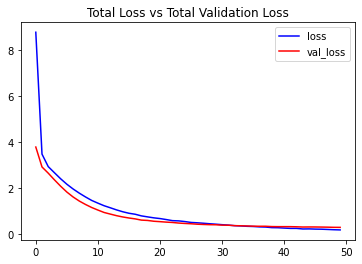

In [17]:
plot_metric('loss', 'val_loss', 'Total Loss vs Total Validation Loss')

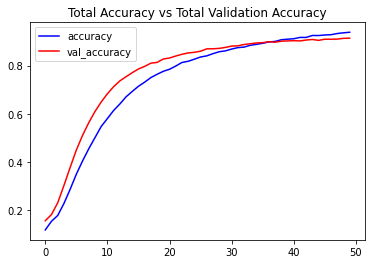

In [18]:
plot_metric('accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

In [20]:
y_pred = model.predict(X_test)

In [21]:
import sklearn
labels = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}

print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], np.argmax(y_pred, axis=1), target_names=list(labels.values())), sep='')


              precision    recall  f1-score   support

           A       0.89      0.90      0.90       354
           B       0.96      0.96      0.96       339
           C       0.93      0.93      0.93       352
           D       0.86      0.90      0.88       332
           E       0.90      0.92      0.91       347
           F       0.97      0.94      0.96       376
           G       0.89      0.89      0.89       351
           H       0.94      0.94      0.94       383
           I       0.91      0.86      0.89       384
           J       0.91      0.92      0.91       361
           K       0.90      0.91      0.90       359
           L       0.95      0.97      0.96       364
           M       0.86      0.83      0.85       401
           N       0.82      0.80      0.81       389
           O       0.96      0.94      0.95       385
           P       0.94      0.94      0.94       352
           Q       0.94      0.97      0.96       365
           R       0.87   

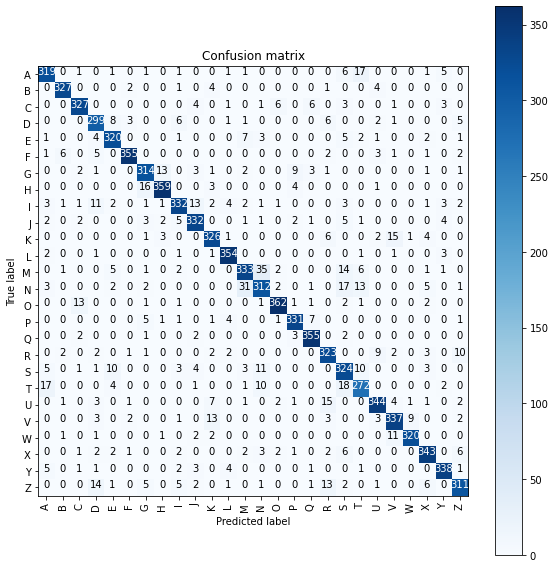

In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
#this
from sklearn.metrics import confusion_matrix
import itertools
Y_pred = np.argmax(y_pred, axis = 1)
Y_true = np.argmax(y_test, axis = 1)
conf = confusion_matrix(Y_true,Y_pred)
plot_confusion_matrix(conf,classes=list(labels.values()))

In [23]:
#Saving the model weights
model.save('Final_model.h5')